In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14

from theme import colors

In [2]:
df = pd.read_csv("summary_md.csv")

In [3]:
df['delta_roc_auc'] = df['mean_roc_auc'] - df['roc_auc']

In [4]:
df.sort_values('delta_roc_auc')

,pdbid,mdid,rmsd,roc_auc,mean_rmsd,mean_roc_auc,median_roc_auc,delta_roc_auc
13,1AK4,bL,0.00,0.780,2.96,0.473,0.468,-0.307
48,1FLE,bR,0.00,0.965,1.81,0.660,0.668,-0.305
15,1AK4,uL,1.98,0.935,2.89,0.651,0.659,-0.284
70,2UUY,uR,0.97,0.950,2.36,0.674,0.699,-0.276
72,2HQS,bR,0.00,0.903,2.27,0.640,0.631,-0.263
...,...,...,...,...,...,...,...,...
3,1JTG,uL,1.22,0.598,1.82,0.755,0.762,0.157
28,3F1P,bR,0.00,0.668,2.58,0.826,0.901,0.158
73,2HQS,bL,0.00,0.496,2.24,0.669,0.679,0.173
47,1RKE,uL,3.41,0.563,3.82,0.770,0.777,0.207


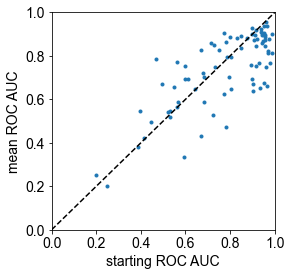

In [5]:
x = df['roc_auc'].values
y = df['mean_roc_auc'].values

# plot
plt.figure(figsize=(4,4))
plt.plot(x,y,'.')
plt.plot([0.0,1.0], [0.0,1.0], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('starting ROC AUC')
plt.ylabel('mean ROC AUC')
plt.show()

In [6]:
np.mean(y-x)*1e2

-3.8074999999999997

In [7]:
df

,pdbid,mdid,rmsd,roc_auc,mean_rmsd,mean_roc_auc,median_roc_auc,delta_roc_auc
0,1JTG,bR,0.00,0.848,2.20,0.889,0.906,0.041
1,1JTG,bL,0.00,0.930,1.81,0.769,0.777,-0.161
2,1JTG,uR,1.34,0.830,2.40,0.884,0.895,0.054
3,1JTG,uL,1.22,0.598,1.82,0.755,0.762,0.157
4,1CLV,bR,0.00,0.521,1.78,0.544,0.544,0.023
...,...,...,...,...,...,...,...,...
75,2HQS,uL,1.57,0.598,2.24,0.693,0.711,0.095
76,2OOB,bR,0.00,0.247,3.08,0.203,0.191,-0.044
77,2OOB,bL,0.00,0.987,1.95,0.901,0.940,-0.086
78,2OOB,uR,1.25,0.198,3.00,0.252,0.236,0.054


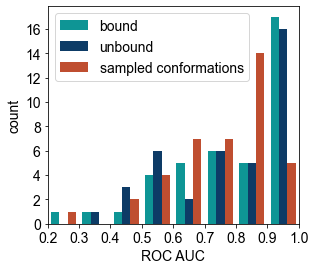

0.7934999999999997 0.7624 0.739875
0.849 0.8165 0.7915000000000001


In [9]:
# set colors
colors = ['#0e9595', '#0d3b66', '#bf4e30']

# extract data
b_auc = df[df['mdid'].isin(["bR", "bL"])]['roc_auc']
u_auc = df[df['mdid'].isin(["uR", "uL"])]['roc_auc']
m_auc = 0.5*(df[df['mdid'].isin(["bR", "bL"])]['mean_roc_auc'].values + df[df['mdid'].isin(["uR", "uL"])]['mean_roc_auc'].values)

# figure
plt.figure(figsize=(4.5,4))
#plt.hist([b_auc, u_auc, m_auc], bins=10, color=colors[:3], label=["bound", "unbound", "sampled conformations"])
plt.hist([b_auc, u_auc, m_auc], range=(0.2,1.0), bins=8, color=colors[:3], label=["bound", "unbound", "sampled conformations"])
plt.yticks(np.arange(0, 16+1, 2), np.arange(0, 16+1, 2))
plt.xticks(np.linspace(0.2, 1.0, 9), np.linspace(0.2, 1.0, 9).round(1))
plt.xlim(0.2,1.0)
plt.legend(loc='best')
plt.xlabel('ROC AUC')
plt.ylabel('count')
plt.savefig("graphs/conformation_assessment_auc.svg")
plt.savefig("graphs/conformation_assessment_auc.png", dpi=300)
plt.show()

# debug print
print(np.mean(b_auc), np.mean(u_auc), np.mean(m_auc))
print(np.median(b_auc), np.median(u_auc), np.median(m_auc))